In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
# Load the CSV file
file_path = 'C:/Users/LENOVO/Downloads/train_and_test2.csv'

data = pd.read_csv(file_path)


In [62]:
#Display the first few rows of the dataframe
print(data.head())


   Passengerid   Age     Fare  gender  sibsp  zero  zero.1  zero.2  zero.3  \
0            1  22.0   7.2500       0      1     0       0       0       0   
1            2  38.0  71.2833       1      1     0       0       0       0   
2            3  26.0   7.9250       1      0     0       0       0       0   
3            4  35.0  53.1000       1      1     0       0       0       0   
4            5  35.0   8.0500       0      0     0       0       0       0   

   zero.4  ...  zero.12  zero.13  zero.14  Pclass  zero.15  zero.16  Embarked  \
0       0  ...        0        0        0       3        0        0       2.0   
1       0  ...        0        0        0       1        0        0       0.0   
2       0  ...        0        0        0       3        0        0       2.0   
3       0  ...        0        0        0       1        0        0       2.0   
4       0  ...        0        0        0       3        0        0       2.0   

   zero.17  zero.18  survived  
0        0  

In [4]:
# Check for missing values
print(data.isnull().sum())

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       2
zero.17        0
zero.18        0
2urvived       0
dtype: int64


In [47]:
print(data.columns)


Index(['Passengerid', 'Age', 'Fare', 'gender', 'sibsp', 'zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17',
       'zero.18', 'survived'],
      dtype='object')


In [8]:
# Example: Fill missing age values with the median
data['Age'].fillna(data['Age'].median(), inplace=True)


In [48]:
# Drop rows with missing target values
data.dropna(subset=['survived'], inplace=True)

In [49]:
# Convert categorical variables to numeric using one-hot encoding
data = pd.get_dummies(data, columns=['gender', 'Embarked'])


In [35]:
# Summary statistics
print(data.describe())


       Passengerid          Age         Fare        sibsp    zero  zero.1  \
count  1309.000000  1309.000000  1309.000000  1309.000000  1309.0  1309.0   
mean    655.000000    29.503186    33.281086     0.498854     0.0     0.0   
std     378.020061    12.905241    51.741500     1.041658     0.0     0.0   
min       1.000000     0.170000     0.000000     0.000000     0.0     0.0   
25%     328.000000    22.000000     7.895800     0.000000     0.0     0.0   
50%     655.000000    28.000000    14.454200     0.000000     0.0     0.0   
75%     982.000000    35.000000    31.275000     1.000000     0.0     0.0   
max    1309.000000    80.000000   512.329200     8.000000     0.0     0.0   

       zero.2  zero.3  zero.4  zero.5  ...  zero.11  zero.12  zero.13  \
count  1309.0  1309.0  1309.0  1309.0  ...   1309.0   1309.0   1309.0   
mean      0.0     0.0     0.0     0.0  ...      0.0      0.0      0.0   
std       0.0     0.0     0.0     0.0  ...      0.0      0.0      0.0   
min       0.0 

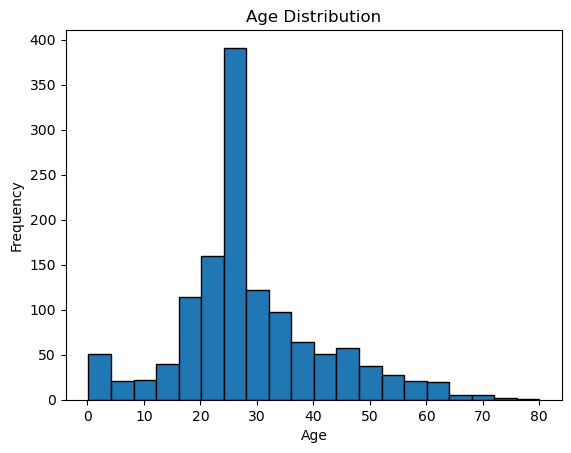

In [19]:
# Histogram of Age
plt.hist(data['Age'], bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

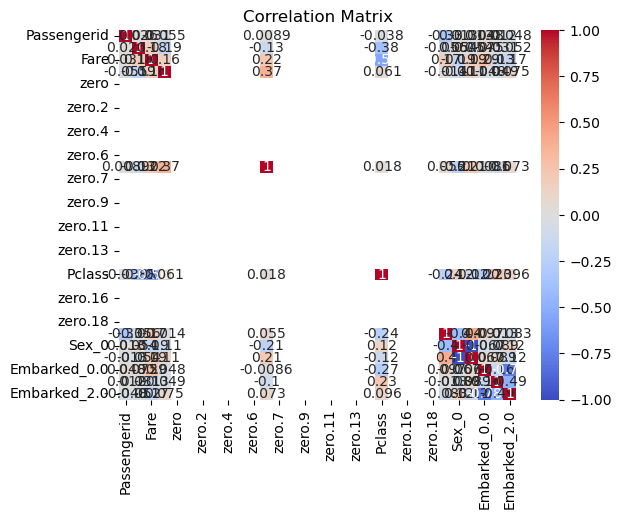

In [21]:
# Correlation matrix
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [63]:
# Check if 'gender' is in the columns
if 'gender' in data.columns:
    # Attempt the groupby operation
    print(data.groupby('gender')['survived'].mean())
else:
    print("Column 'gender' not found in data.")


gender
0    0.1293
1    0.5000
Name: survived, dtype: float64


In [56]:
# Survival rate by Pclass
print(data.groupby('Pclass')['survived'].mean())

Pclass
1    0.421053
2    0.314079
3    0.167842
Name: survived, dtype: float64
